# Project: Investigate a Dataset - [Gun and Census data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Dataset Description 
 
The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.The data has been supplemented with state level data from <a href="#census.gov">census.gov</a>

### Questions for analysis:

- What is the most purchased type of gun in 2021?
- Which states have had the highest gun registration in 2016 and 2022?
- What is the estimated number of civilians gun registration per capita by states in 2016 and 2021?

In [2]:
# Lets import the necessary libraies before begining the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 1. Data Wrangling
### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
gun = pd.read_csv("C:\\Users\\HP\\Downloads\\nics-firearm-background-checks.csv")
census = pd.read_csv("C:\\Users\\HP\\Downloads\\u.s.-census-data.csv")

In [4]:
# Lets explore the structure of the data 
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-04,Alabama,16150.0,236.0,20593.0,12513.0,1249.0,1041,0.0,21.0,...,0.0,0.0,0.0,16.0,19.0,4.0,0.0,1.0,0.0,54956
1,2022-04,Alaska,354.0,19.0,3425.0,2946.0,391.0,192,0.0,2.0,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,7589
2,2022-04,Arizona,25746.0,1305.0,20628.0,9300.0,1814.0,1253,0.0,7.0,...,0.0,0.0,0.0,16.0,10.0,0.0,0.0,0.0,0.0,61899
3,2022-04,Arkansas,2043.0,364.0,7659.0,5376.0,483.0,390,4.0,3.0,...,0.0,0.0,0.0,12.0,7.0,2.0,0.0,0.0,0.0,18222
4,2022-04,California,17944.0,12972.0,38217.0,25572.0,5595.0,5,1.0,1.0,...,158.0,0.0,0.0,7491.0,3186.0,698.0,23.0,7.0,0.0,116208


In [5]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [6]:
gun.shape

(15510, 27)

In [7]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15510 entries, 0 to 15509
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      15510 non-null  object 
 1   state                      15510 non-null  object 
 2   permit                     15486 non-null  float64
 3   permit_recheck             4125 non-null   float64
 4   handgun                    15490 non-null  float64
 5   long_gun                   15491 non-null  float64
 6   other                      8525 non-null   float64
 7   multiple                   15510 non-null  int64  
 8   admin                      15487 non-null  float64
 9   prepawn_handgun            13567 non-null  float64
 10  prepawn_long_gun           13565 non-null  float64
 11  prepawn_other              8140 non-null   float64
 12  redemption_handgun         13570 non-null  float64
 13  redemption_long_gun        13569 non-null  flo

- The gun data has missing values which needs to be addressed.

In [8]:
# Lets take a look at the stastistical summary of the gun data
gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,15486.000000,4.125000e+03,15490.000000,15491.000000,8525.000000,15510.000000,15487.000000,13567.000000,13565.000000,8140.000000,...,4840.000000,4015.000000,3850.000000,5775.000000,5775.000000,5775.000000,5500.000000,5775.000000,5280.000000,1.551000e+04
mean,7477.605579,9.441435e+03,7382.750161,8024.963979,588.898534,306.887814,51.038807,5.141667,7.329672,0.408477,...,3.432025,0.139477,0.148571,52.051082,31.169177,5.658528,1.058182,0.975065,0.131061,2.700583e+04
std,26831.029024,6.031967e+04,10914.017822,9190.871934,1383.784381,777.745156,550.385303,11.307888,15.546089,1.419279,...,22.652690,0.951737,0.956717,417.743340,182.109269,37.808728,5.038520,4.012848,0.523244,4.988908e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,1077.000000,2201.500000,33.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.174250e+03
50%,881.000000,0.000000e+00,3647.500000,5331.000000,194.000000,137.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.370900e+04
75%,5843.750000,1.160000e+02,8924.750000,10872.000000,627.000000,341.000000,0.000000,5.000000,7.000000,0.000000,...,1.000000,0.000000,0.000000,16.000000,15.000000,2.000000,0.000000,1.000000,0.000000,3.015050e+04
max,522188.000000,1.350676e+06,147714.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,592.000000,13.000000,12.000000,10623.000000,4159.000000,829.000000,70.000000,62.000000,18.000000,1.427917e+06


In [9]:
census.columns.values

array(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

### Note:
- Census_data did not include Guam, Puerto Rico, District Columbia, Virgin Islands, and Mariana Islands; 
- Therefore, I am going to remove them to match census data
- I will merge gun_data and census_data after cleaning. 

In [10]:
# Remove name of the colonies : Guam, Puerto Rico, District Columbia, Virgin Islands, and Mariana Islands 
gun = gun[gun.state != 'Guam']
gun = gun[gun.state != 'Puerto Rico']
gun = gun[gun.state != 'District of Columbia']
gun = gun[gun.state != 'Virgin Islands']
gun = gun[gun.state != 'Mariana Islands']

In [11]:
#Drop all the variables not need ---> to calculate per capita 
gun_capita = gun.drop([ 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis = 1)

In [12]:
gun_capita.head()


,month,state,totals
0,2022-04,Alabama,54956
1,2022-04,Alaska,7589
2,2022-04,Arizona,61899
3,2022-04,Arkansas,18222
4,2022-04,California,116208


In [13]:
#Earlier I noticed the data type for month was wrong so lets take care of that
gun_capita['month'] = pd.to_datetime(gun['month'])

In [14]:
gun_capita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14100 entries, 0 to 15509
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   14100 non-null  datetime64[ns]
 1   state   14100 non-null  object        
 2   totals  14100 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 440.6+ KB


Now lets answer the question:
- What is the estimated number of civilians gun registration per capita by states in 2016 and 2021?

In [15]:
#Get all the 2022-04-01 
gun_2016 = gun_capita[gun_capita['month'] == '2016-04-01']
gun_2016.head(10)

,month,state,totals
3960,2016-04-01,Alabama,41239
3961,2016-04-01,Alaska,6867
3962,2016-04-01,Arizona,32005
3963,2016-04-01,Arkansas,19048
3964,2016-04-01,California,171256
3965,2016-04-01,Colorado,41636
3966,2016-04-01,Connecticut,32657
3967,2016-04-01,Delaware,4316
3969,2016-04-01,Florida,104114
3970,2016-04-01,Georgia,41265


In [16]:
gun_2016.describe()

,totals
count,50.000000
mean,42688.200000
std,54731.058568
min,1453.000000
25%,10996.750000
50%,25104.000000
75%,47020.250000
max,306214.000000


In [17]:
#Get all the 2021-07-01 
gun_2021 = gun_capita[gun_capita['month'] == '2021-07-01' ]
gun_2021.head(10)

,month,state,totals
495,2021-07-01,Alabama,66051
496,2021-07-01,Alaska,6620
497,2021-07-01,Arizona,38125
498,2021-07-01,Arkansas,18454
499,2021-07-01,California,116701
500,2021-07-01,Colorado,44778
501,2021-07-01,Connecticut,16773
502,2021-07-01,Delaware,5141
504,2021-07-01,Florida,125688
505,2021-07-01,Georgia,57185


In [18]:
gun_2016.describe()

,totals
count,50.000000
mean,42688.200000
std,54731.058568
min,1453.000000
25%,10996.750000
50%,25104.000000
75%,47020.250000
max,306214.000000


In [19]:
#Concat or inner join 2016 and 2021 to 
concat_gun = pd.concat([gun_2016,gun_2021 ], keys=['2016-04-01', '2021-07-01'], axis = 0)
concat_gun.head()

month       state  totals
2016-04-01 3960 2016-04-01     Alabama   41239
           3961 2016-04-01      Alaska    6867
           3962 2016-04-01     Arizona   32005
           3963 2016-04-01    Arkansas   19048
           3964 2016-04-01  California  171256

In [20]:
#Reset index
concat_gun.reset_index(drop=True, inplace=True)

In [21]:
concat_gun.tail()

,month,state,totals
95,2021-07-01,Virginia,45531
96,2021-07-01,Washington,50887
97,2021-07-01,West Virginia,14625
98,2021-07-01,Wisconsin,59969
99,2021-07-01,Wyoming,5706


## 2. Data Cleaning - Census Data

In [22]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [23]:
#Droppping all the columns that is not associated with gun_data and reset its index
census = census.drop(census.index[65: 85]).reset_index()

In [24]:
#Droping the first column 'Fact Note'
census = census.drop(['Fact Note'], axis =1 )

In [25]:
# All the NAs become 0.0
census= census.fillna(0.0)

#### Source:  https://stackoverflow.com/questions/38980714/pandas-setting-multi-index-on-rows-then-transposing-to-columns

In [26]:
#Transpose in order to join with gun_data in the future
census.set_index('Fact',inplace=True)
census = census.T.reset_index()

In [27]:
census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [29]:
#Rename index into state before joining 
census.rename(columns={'index':'state'},inplace = True)

In [28]:
census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


- I need to convert all the columns state and "Population estimates, July 1, 2016, (v2016)" from object to float.
- Converting from object to float would help me to calculate the numbers

In [30]:
# Create new tables c_16
census_16 = census[['state', 'Population estimates, July 1, 2016,  (V2016)']] 
census_16.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"


In [31]:
census_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   state                                         51 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


### Merging Census and Gun Data

In [32]:
#Display census_16 and reset it
census_16.reset_index(drop = True).head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"


In [33]:
#Display gun_2016 and reset it
gun_2016= gun_2016.reset_index(drop= True)
gun_2016.head()

,month,state,totals
0,2016-04-01,Alabama,41239
1,2016-04-01,Alaska,6867
2,2016-04-01,Arizona,32005
3,2016-04-01,Arkansas,19048
4,2016-04-01,California,171256


In [34]:
#Display it and reset it
gun_2021 = gun_2021.reset_index(drop= True)
gun_2021.head()

,month,state,totals
0,2021-07-01,Alabama,66051
1,2021-07-01,Alaska,6620
2,2021-07-01,Arizona,38125
3,2021-07-01,Arkansas,18454
4,2021-07-01,California,116701


In [35]:
#Display concat_gun; it is a cleaned version(note: only use concat for charts)
concat_gun.head()

,month,state,totals
0,2016-04-01,Alabama,41239
1,2016-04-01,Alaska,6867
2,2016-04-01,Arizona,32005
3,2016-04-01,Arkansas,19048
4,2016-04-01,California,171256


In [36]:
concat_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   100 non-null    datetime64[ns]
 1   state   100 non-null    object        
 2   totals  100 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.5+ KB


<a id='eda'></a>
## 3. Exploratory Data Analysis
### What is the estimated number of civilians gun registration per capita by states in 2016 and 2021?
unfortunately the census data has only data from 2016 so we can only answer gun registration per capita in 2016

In [38]:
census_diff = census_16
census_diff.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"


In [39]:
census_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   state                                         51 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [49]:
#Merge 2016 and 2021
census_diff = gun_2016.merge(census_16, on='state', how='left')
census_diff.head() # ---> this will be used to find gun per capita

#month_x and totals_x come from gun_2016

,month,state,totals,"Population estimates, July 1, 2016, (V2016)"
0,2016-04-01,Alabama,41239,"4,863,300"
1,2016-04-01,Alaska,6867,"741,894"
2,2016-04-01,Arizona,32005,"6,931,071"
3,2016-04-01,Arkansas,19048,"2,988,248"
4,2016-04-01,California,171256,"39,250,017"


In [84]:
#Replace ',' to this '' 
census_diff['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)
census_diff

,month,state,totals,"Population estimates, July 1, 2016, (V2016)"
0,2016-04-01,Alabama,41239,4863300
1,2016-04-01,Alaska,6867,741894
2,2016-04-01,Arizona,32005,6931071
3,2016-04-01,Arkansas,19048,2988248
4,2016-04-01,California,171256,39250017
5,2016-04-01,Colorado,41636,5540545
6,2016-04-01,Connecticut,32657,3576452
7,2016-04-01,Delaware,4316,952065
8,2016-04-01,Florida,104114,20612439
9,2016-04-01,Georgia,41265,10310371


In [88]:
census_diff.reset_index(drop = True).head()

,month,state,totals,"Population estimates, July 1, 2016, (V2016)"
0,2016-04-01,Alabama,41239,4863300
1,2016-04-01,Alaska,6867,741894
2,2016-04-01,Arizona,32005,6931071
3,2016-04-01,Arkansas,19048,2988248
4,2016-04-01,California,171256,39250017


In [93]:
# Checking gun per capita in 2016
capita_2016 = gun_diff['totals_x'].sum()/census_diff['Population estimates, July 1, 2016,  (V2016)'].astype('float').sum()
capita_2016

0.0066194269103557486

In [97]:
# Convert the capita into a percentage 
def percent(value):
    if value > 0.001:
        result = value *100
    return result 
percent(capita_2016)

0.6619426910355749

- Gun per capita in 2016 is 0.6619426910355749 %.

### Which states have had the highest gun registration in  2016, and 2022?

In [99]:
#Now merge census_diff and gun_diff to check the connnection
gun_usa = census_diff.merge(gun_diff, on='state', how='left')
gun_usa.head()
#month_x and totals_x 

,month,state,totals,"Population estimates, July 1, 2016, (V2016)",month_x,totals_x,month_y,totals_y
0,2016-04-01,Alabama,41239,4863300,2016-04-01,41239,2021-07-01,66051
1,2016-04-01,Alaska,6867,741894,2016-04-01,6867,2021-07-01,6620
2,2016-04-01,Arizona,32005,6931071,2016-04-01,32005,2021-07-01,38125
3,2016-04-01,Arkansas,19048,2988248,2016-04-01,19048,2021-07-01,18454
4,2016-04-01,California,171256,39250017,2016-04-01,171256,2021-07-01,116701


In [100]:
gun_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   month                                         50 non-null     datetime64[ns]
 1   state                                         50 non-null     object        
 2   totals                                        50 non-null     int64         
 3   Population estimates, July 1, 2016,  (V2016)  50 non-null     object        
 4   month_x                                       50 non-null     datetime64[ns]
 5   totals_x                                      50 non-null     int64         
 6   month_y                                       50 non-null     datetime64[ns]
 7   totals_y                                      50 non-null     int64         
dtypes: datetime64[ns](3), int64(3), object(2)
memory usage: 3.5+ KB


In [101]:
#Bring back the the previous dataframe 
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-04,Alabama,16150.0,236.0,20593.0,12513.0,1249.0,1041,0.0,21.0,...,0.0,0.0,0.0,16.0,19.0,4.0,0.0,1.0,0.0,54956
1,2022-04,Alaska,354.0,19.0,3425.0,2946.0,391.0,192,0.0,2.0,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,7589
2,2022-04,Arizona,25746.0,1305.0,20628.0,9300.0,1814.0,1253,0.0,7.0,...,0.0,0.0,0.0,16.0,10.0,0.0,0.0,0.0,0.0,61899
3,2022-04,Arkansas,2043.0,364.0,7659.0,5376.0,483.0,390,4.0,3.0,...,0.0,0.0,0.0,12.0,7.0,2.0,0.0,0.0,0.0,18222
4,2022-04,California,17944.0,12972.0,38217.0,25572.0,5595.0,5,1.0,1.0,...,158.0,0.0,0.0,7491.0,3186.0,698.0,23.0,7.0,0.0,116208


In [104]:
#Make a new table 2016 
gun_016 = gun[gun['month'] == '2016-09' ]
gun_016.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
3685,2016-09,Alabama,22014.0,0.0,7125.0,8449.0,319.0,372,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41336
3686,2016-09,Alaska,306.0,0.0,2654.0,3126.0,180.0,181,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6867
3687,2016-09,Arizona,8641.0,86.0,11769.0,8951.0,1086.0,639,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33390
3688,2016-09,Arkansas,3300.0,696.0,4802.0,6284.0,231.0,324,22.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18826
3689,2016-09,California,62196.0,0.0,39213.0,43015.0,13548.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159077


In [105]:
#Sort it in the opposite direction 
gun_016.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
3703,2016-09,Kentucky,276744.0,0.0,8917.0,8172.0,257.0,590,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,298753
3689,2016-09,California,62196.0,0.0,39213.0,43015.0,13548.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159077
3699,2016-09,Illinois,17365.0,77223.0,20298.0,11876.0,0.0,773,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127535
3731,2016-09,Texas,29142.0,0.0,37858.0,42308.0,2888.0,2436,0.0,35.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126694
3694,2016-09,Florida,24431.0,0.0,45848.0,22439.0,3359.0,1891,2.0,24.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102843
3725,2016-09,Pennsylvania,26936.0,0.0,46101.0,12697.0,31.0,0,120.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86424
3700,2016-09,Indiana,30423.0,0.0,17402.0,13402.0,1291.0,636,11.0,4.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63820
3738,2016-09,Wisconsin,30268.0,0.0,13271.0,14796.0,691.0,33,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59639
3722,2016-09,Ohio,11166.0,141.0,24297.0,18038.0,1573.0,1121,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58828
3710,2016-09,Minnesota,30783.0,0.0,9548.0,16213.0,695.0,413,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58507


List of 10 high gun by states in 2016

- Kentucky
- California
- Illinois
- Texas
- Florida
- Pennsylvania
- Indianna
- Wisconsin
- Ohio
- Minnesota

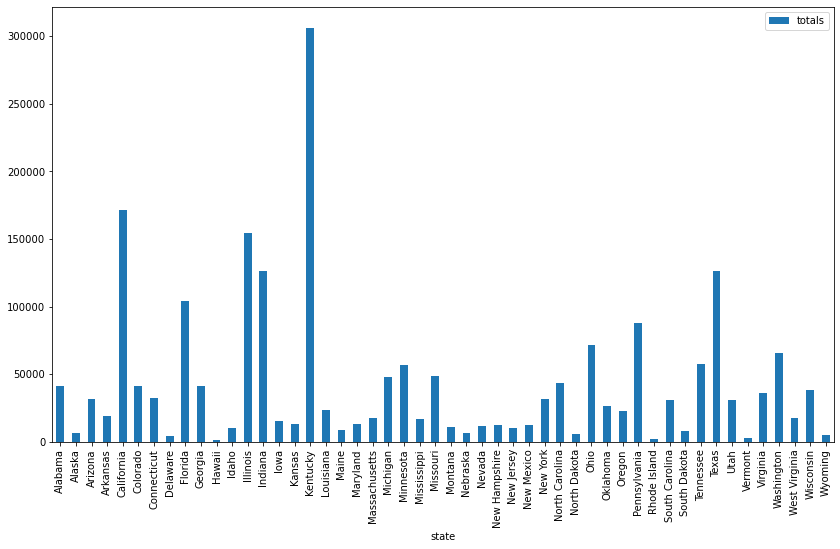

In [114]:
# plot 2016 
gun_2016.plot(x='state', y='totals', kind='bar', figsize=(14,8)); #Compare t0 2021

In [112]:
#Make a new table 2021
gun_021 = gun[gun['month'] == '2021-09' ]
gun_021.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
385,2021-09,Alabama,26657.0,423.0,18034.0,15390.0,1365.0,912,0.0,16.0,...,0.0,0.0,0.0,27.0,30.0,7.0,0.0,0.0,0.0,65900
386,2021-09,Alaska,174.0,13.0,2497.0,3094.0,310.0,173,0.0,1.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,6520
387,2021-09,Arizona,5962.0,780.0,18406.0,10477.0,1769.0,985,0.0,4.0,...,0.0,0.0,0.0,10.0,9.0,3.0,0.0,2.0,0.0,40033
388,2021-09,Arkansas,3259.0,719.0,6946.0,6783.0,495.0,388,1.0,6.0,...,0.0,0.0,0.0,8.0,3.0,0.0,0.0,1.0,0.0,20536
389,2021-09,California,17520.0,14442.0,37842.0,27880.0,6190.0,0,0.0,0.0,...,101.0,0.0,0.0,6793.0,2963.0,541.0,23.0,18.0,0.0,116704


In [113]:
#Sort it in the descending to find out the higest states with guns
gun_021.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
403,2021-09,Kentucky,703.0,346021.0,10921.0,9383.0,586.0,563,0.0,16.0,...,0.0,0.0,0.0,25.0,26.0,1.0,0.0,0.0,0.0,370706
399,2021-09,Illinois,312148.0,0.0,22461.0,11566.0,1287.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347462
431,2021-09,Texas,24746.0,0.0,71702.0,41561.0,4300.0,3156,9.0,50.0,...,0.0,0.0,0.0,69.0,34.0,6.0,1.0,1.0,0.0,154778
394,2021-09,Florida,24490.0,0.0,59728.0,25555.0,5125.0,3277,0.0,17.0,...,4.0,0.0,0.0,327.0,243.0,74.0,39.0,34.0,0.0,124186
389,2021-09,California,17520.0,14442.0,37842.0,27880.0,6190.0,0,0.0,0.0,...,101.0,0.0,0.0,6793.0,2963.0,541.0,23.0,18.0,0.0,116704
400,2021-09,Indiana,1756.0,63737.0,20859.0,14814.0,1857.0,1051,2.0,9.0,...,0.0,0.0,0.0,30.0,30.0,7.0,1.0,1.0,0.0,105065
425,2021-09,Pennsylvania,33224.0,0.0,44601.0,22537.0,34.0,0,414.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101592
432,2021-09,Utah,11111.0,63964.0,5008.0,5004.0,509.0,0,0.0,5.0,...,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86418
410,2021-09,Minnesota,16079.0,28422.0,11308.0,16661.0,1107.0,633,0.0,0.0,...,1.0,0.0,0.0,17.0,15.0,0.0,1.0,0.0,1.0,74716
409,2021-09,Michigan,17459.0,5852.0,22956.0,21452.0,2140.0,845,0.0,0.0,...,0.0,0.0,0.0,18.0,13.0,2.0,1.0,0.0,0.0,71059


List of 10 high gun by states in 2021

- Illinois
- Kentucky
- Texas
- Florida
- California
- Indianna
- Pennsylvania
- Utah
- Minnesota
- Michigan

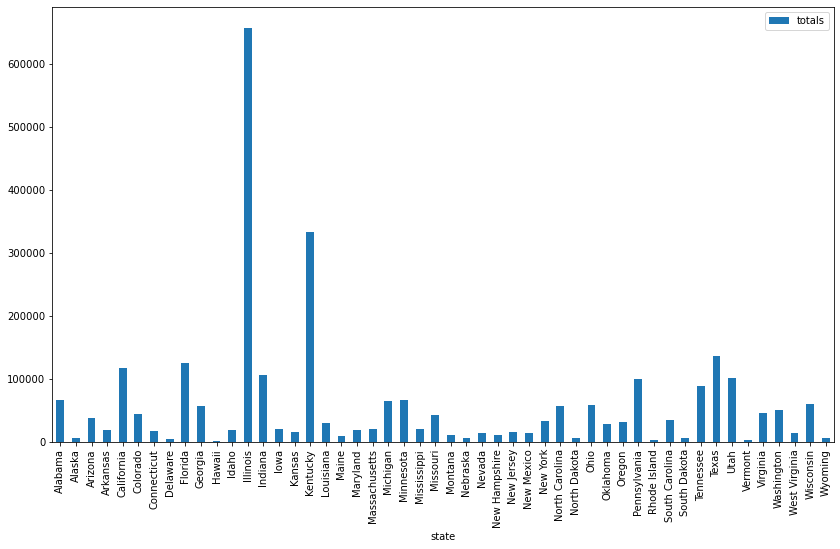

In [115]:
# plot 2021
gun_2021.plot(x='state', y='totals', kind='bar', figsize=(14,8)); 

### What is the most purchased type of gun in 2021?

In [117]:
#Display gun data for 2021
gun_021.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
385,2021-09,Alabama,26657.0,423.0,18034.0,15390.0,1365.0,912,0.0,16.0,...,0.0,0.0,0.0,27.0,30.0,7.0,0.0,0.0,0.0,65900
386,2021-09,Alaska,174.0,13.0,2497.0,3094.0,310.0,173,0.0,1.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,6520
387,2021-09,Arizona,5962.0,780.0,18406.0,10477.0,1769.0,985,0.0,4.0,...,0.0,0.0,0.0,10.0,9.0,3.0,0.0,2.0,0.0,40033
388,2021-09,Arkansas,3259.0,719.0,6946.0,6783.0,495.0,388,1.0,6.0,...,0.0,0.0,0.0,8.0,3.0,0.0,0.0,1.0,0.0,20536
389,2021-09,California,17520.0,14442.0,37842.0,27880.0,6190.0,0,0.0,0.0,...,101.0,0.0,0.0,6793.0,2963.0,541.0,23.0,18.0,0.0,116704


In [118]:
# What type of gun are people buying in 2021 (other, mutiple, handgun_long_gun)

gun = ['handgun', 'long_gun', 'other', 'multiple']
purchases = [477315, 417126,26897,17612]

In [119]:
yman = np.arange(len(gun))
yman

array([0, 1, 2, 3])

No handles with labels found to put in legend.


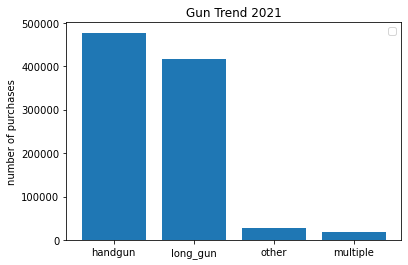

In [121]:
plt.xticks(yman, gun)
plt.ylabel('number of purchases')
plt.title('Gun Trend 2021')
plt.bar(yman, purchases )
plt.legend()

Answers:
Most purchased gun in 2021
Handgun
Longun
other
mutiple

### Conclusions
In conclusion, The gun and census data shared similar variables such as states and date. Comparing and contrasting both data by countries and date would give the idea about the gun registration per capita in 2016. Gun per capita in 2016 is 0.6619426910355749 %. Additionally, states such as Kentucky, California, Texas, Florida, and Ohio are the most common states with high gun records. The type of guns that the population in the United States purchased the most in 2021 are primarily handguns; second is the long_guns and other types of firearms.

When it comes to the limitation, there are missing data for U.S colonies such as Puerto Rico, Guam, and others in census_data. It would be appropriate to include them in census data to calculate and check the result of gun per capita. Secondly, Kentucky might be an outlier among the states. By observing Kentucky from 2010,2016, 2017-- the record is surprisingly higher than other American states like Lousiana. In my opinion, it would be reasonable to recheck the data from Kentucky. In different ways, Illinois might be an outlier too because it has been registered a high gun registration in the U.S-- however, Illinois has the strictest gun control in America. It is advised to further the investigation of the states of Illinois.

Source: https://www.politifact.com/illinois/statements/2017/oct/03/sarah-huckabee-sanders/chicago-toughest-gun-control-claim-shot-full-holes/

In [122]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1